
## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 1

Cézar Augusto Meira Carmo

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [2]:
# Dataset
clean_data_path = "autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

In [3]:
# Visualizando o Dataset
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [4]:
# Listando as colunas do Dataset
list(df)

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'postalCode',
 'lastSeen',
 'yearOfCreation',
 'yearCrawled',
 'monthOfCreation',
 'monthCrawled',
 'NoOfDaysOnline',
 'NoOfHrsOnline',
 'yearsOld',
 'monthsOld']

## Distribuição de Veículos com base no Ano de Registro

C:\Users\Cezar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


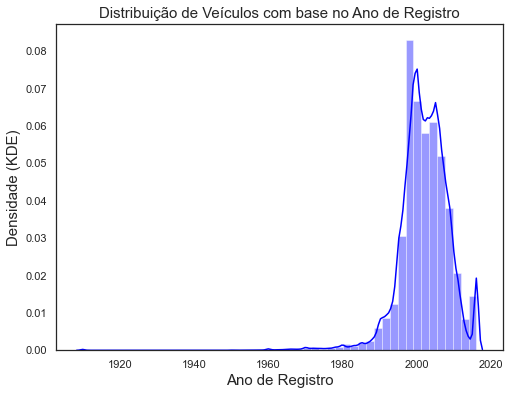

In [5]:
# Crie um Plot com a Distribuição de Veículos com base no Ano de Registro
grf_1, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["yearOfRegistration"], color="blue",kde=True, ax=ax)
ax.set_title('Distribuição de Veículos com base no Ano de Registro', fontsize= 15)
plt.ylabel("Densidade (KDE)", fontsize= 15)
plt.xlabel("Ano de Registro", fontsize= 15)
plt.show()

In [6]:
# Salvando o plot
grf_1.savefig(r"C:\Users\Cezar\OneDrive\Área de Trabalho\Python Fundamentos\Cap09\Mini-Projeto\vehicle-distribution.png")

## Variação da faixa de preço pelo tipo de veículo

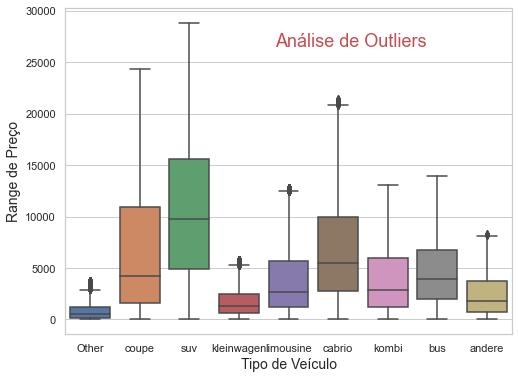

In [7]:
# Crie um Boxplot para avaliar os outliers
sns.set_style("whitegrid")
grf_2, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'vehicleType', y = 'price', data = df)
ax.text(5.25,27000,"Análise de Outliers",fontsize=18,color="r",ha="center", va="center")
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':14})
ax.yaxis.set_label_text("Range de Preço",fontdict= {'size':14})
plt.show()

In [8]:
# Salvando o plot
grf_2.savefig(r"C:\Users\Cezar\OneDrive\Área de Trabalho\Python Fundamentos\Cap09\Mini-Projeto\price-vehicleType-boxplot.png")

## Contagem total de veículos à venda conforme o tipo de veículo

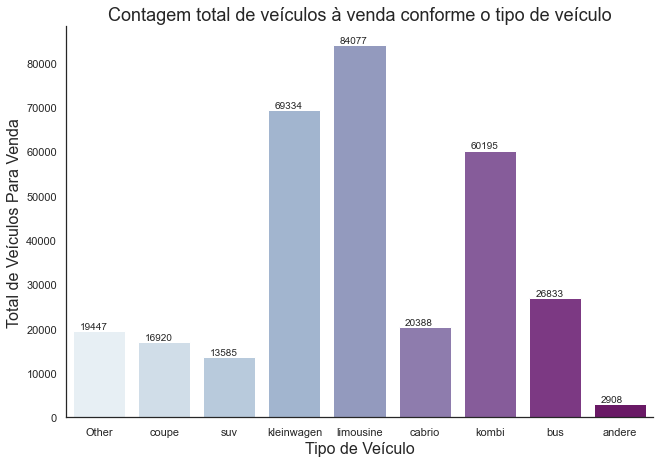

In [9]:
# Crie um Count Plot que mostre o número de veículos pertencentes a cada categoria 
sns.set_style("white")
grf_3 = sns.catplot(x="vehicleType", data=df, kind="count", palette="BuPu", height=6, aspect=1.5)
grf_3.ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':16})
grf_3.ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict= {'size':16})
grf_3.ax.set_title("Contagem total de veículos à venda conforme o tipo de veículo",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in grf_3.ax.patches:
    grf_3.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

In [10]:
# Salvando o plot
grf_3.savefig(r"C:\Users\Cezar\OneDrive\Área de Trabalho\Python Fundamentos\Cap09\Mini-Projeto\count-vehicleType.png")

# Fim